## Pair Programming - Regresión logística 1

### EDA

---

In [274]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import sidetable 
import awoc

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de warnings
import warnings
warnings.filterwarnings("ignore")

In [275]:
#pip install a-world-of-countries

Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

**Objetivos:**
### 1. Buscar un conjunto de datos a analizar.
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.

In [276]:
df = pd.read_csv('../archivos/travel_insurance.csv', index_col=0).reset_index()
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


### 2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado.

A third-party travel insurance servicing company that is based in Singapore (datos sobre aseguradoras y sus seguros de viaje)

The attributes/columnas del dataframe:

- **Agency**: Name of agency  ----> Siglas de los nombres de 16 agencias diferentes.

- **Agency Type** : Type of travel insurance agencies  ----> Travel Agency & Airlines.

- **Distribution Channel**:  Distribution channel of travel insurance agencies  ----> Online & Offline.

- **Product Name**: Name of the travel insurance products ----> Nombre de los tipos de paquetes de seguros. 

- **Claim Status**: Target- Claim Status  ----> Yes & No (Si reclamaron o no el seguro de viaje)

- **Duration**: Duration of travel ---->

- **Destination**: Destination of travel ----> Destinos a todo el mundo.

- **Net Sales**: Amount of sales of travel insurance policies ----> Cantidad de la venta de seguros.

- **Commission**: Commission received for travel insurance agency ----> Comisión para la agencia de los seguros de viajes.

- **Gender**: Gender of insured ----> Género del cliente.

- **Age**: Age of insured ----> Edad del cliente.

### 3. Realizar un EDA sencillo.

In [277]:
#Tamaño
df.shape

(63326, 11)

In [278]:
#Nombre de las columnas
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

In [279]:
#Adaptamos el nombre de las columnas sin espacios y en minúsculas
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [280]:
df.columns

Index(['agency', 'agency_type', 'distribution_channel', 'product_name',
       'claim', 'duration', 'destination', 'net_sales', 'commision_(in_value)',
       'gender', 'age'],
      dtype='object')

In [281]:
#Información básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agency                63326 non-null  object 
 1   agency_type           63326 non-null  object 
 2   distribution_channel  63326 non-null  object 
 3   product_name          63326 non-null  object 
 4   claim                 63326 non-null  object 
 5   duration              63326 non-null  int64  
 6   destination           63326 non-null  object 
 7   net_sales             63326 non-null  float64
 8   commision_(in_value)  63326 non-null  float64
 9   gender                18219 non-null  object 
 10  age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [282]:
#Principales estadísticos de las variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,63326.0,49.317074,101.791566,-2.0,9.0,22.00,53.00,4881.0
net_sales,63326.0,40.702018,48.845637,-389.0,18.0,26.53,48.00,810.0
commision_(in_value),63326.0,9.809992,19.804388,0.0,0.0,0.00,11.55,283.5
age,63326.0,39.969981,14.017010,0.0,35.0,36.00,43.00,118.0


📍 duration, net_sales y age --> cheaquear posibles outliers y valores negativos

In [283]:
#Principales estadísticos de las variables categóricas
df.describe(include='object').T

,count,unique,top,freq
agency,63326,16,EPX,35119
agency_type,63326,2,Travel Agency,45869
distribution_channel,63326,2,Online,62219
product_name,63326,26,Cancellation Plan,18630
claim,63326,2,No,62399
destination,63326,149,SINGAPORE,13255
gender,18219,2,M,9347


📍 product_name y destination --> reagrupar en menos categorías

### 3.1. Tratamiento de valores nulos

In [284]:
#Porcenaje valores nulos
round(df.isnull().sum()*100/df.shape[0],2)

agency                   0.00
agency_type              0.00
distribution_channel     0.00
product_name             0.00
claim                    0.00
duration                 0.00
destination              0.00
net_sales                0.00
commision_(in_value)     0.00
gender                  71.23
age                      0.00
dtype: float64

In [285]:
df.gender.value_counts() 

M    9347
F    8872
Name: gender, dtype: int64

📍 Reemplazamos los valores nulos de gender por una tercera categoría, 'I prefer not to say'/ 'PNS'

In [286]:
df.gender.fillna('PNS', inplace=True)

In [287]:
df.gender.value_counts()

PNS    45107
M       9347
F       8872
Name: gender, dtype: int64

### 3.2. Tratamiento de duplicados

In [288]:
#Valores duplicados
df.duplicated().sum()

8042

In [289]:
#Borramos las filas duplicadas
df.drop_duplicates(inplace=True)

In [290]:
print(f'El dataframe limpio tiene:\n--------------------------\nNº filas ----------> {df.shape[0]}\nNº columnas -------> {df.shape[1]}')

El dataframe limpio tiene:
--------------------------
Nº filas ----------> 55284
Nº columnas -------> 11


### 3.3. Tipo de datos.

In [291]:
df.dtypes

agency                   object
agency_type              object
distribution_channel     object
product_name             object
claim                    object
duration                  int64
destination              object
net_sales               float64
commision_(in_value)    float64
gender                   object
age                       int64
dtype: object

- **Agency**: es de tipo object, está en el formato correcto. Tiene bastantes registros únicos.

- **Agency Type** : es de tipo object, con dos valores únicos que habrá que codificar.

- **Distribution Channel**: es de tipo object, con dos valores únicos que habrá que codificar.

- **Product Name**: es de tipo object, recategorizada en menos valores únicos aunque habrá que codificar.

- **Claim Status**: Variable respuesta dicotómica de tipo object que habrá que codificar.

- **Duration**: es de tipo numérica, la recategorizaremos en menos valores únicos y habrá que codificar.

- **Destination**: es de tipo object, la recategorizaremos en menos valores únicos y habrá que codificar.

- **Net Sales**: es de tipo float, está en el formato correcto.

- **Commission**: es de tipo float, está en el formato correcto.

- **Gender**: es de tipo object, está en el formato correcto. Habrá que codificar.

- **Age**: es de tipo numérica, la recategorizaremos en menos valores únicos y habrá que codificar.

### 3.4. Recategorizamos la columna product_name

In [292]:
df_lista= pd.DataFrame(df['product_name'].value_counts()).reset_index()


In [293]:
lista_seguros = df_lista['index'].tolist()

In [294]:
lista_seguros

['Cancellation Plan',
 '2 way Comprehensive Plan',
 'Rental Vehicle Excess Insurance',
 'Basic Plan',
 'Bronze Plan',
 '1 way Comprehensive Plan',
 'Value Plan',
 'Silver Plan',
 'Annual Silver Plan',
 'Ticket Protector',
 'Travel Cruise Protect',
 'Comprehensive Plan',
 'Gold Plan',
 '24 Protect',
 'Single Trip Travel Protect Gold',
 'Annual Gold Plan',
 'Premier Plan',
 'Single Trip Travel Protect Silver',
 'Annual Travel Protect Gold',
 'Annual Travel Protect Silver',
 'Single Trip Travel Protect Platinum',
 'Individual Comprehensive Plan',
 'Annual Travel Protect Platinum',
 'Spouse or Parents Comprehensive Plan',
 'Child Comprehensive Plan',
 'Travel Cruise Protect Family']

In [295]:
#Mantenemos los nombres de productos que engloban el 60% de los datos y el 40% restante 
# lo agrupamos en others insurances.

mapa_seguros = {'Cancellation Plan' : 'Cancellation Plan' ,
 '2 way Comprehensive Plan':'2 way Comprehensive Plan' ,
 'Rental Vehicle Excess Insurance': 'Rental Vehicle Excess Insurance',
 'Basic Plan':'Basic Plan' ,
 'Bronze Plan':'Bronze Plan',
 '1 way Comprehensive Plan': '1 way Comprehensive Plan',
 'Value Plan': 'Value Plan',
 'Silver Plan':'Silver Plan',
 'Annual Silver Plan':'Annual Silver Plan',
 'Ticket Protector': 'Ticket Protector',
 'Travel Cruise Protect': 'Travel Cruise Protect' ,
 'Comprehensive Plan':'Comprehensive Plan',
 'Gold Plan':'Gold Plan',
 '24 Protect': 'Others insurances',
 'Single Trip Travel Protect Gold':'Others insurances',
 'Annual Gold Plan':'Others insurances',
 'Premier Plan' :'Others insurances',
 'Single Trip Travel Protect Silver' : 'Others insurances',
 'Annual Travel Protect Gold' : 'Others insurances',
 'Annual Travel Protect Silver': 'Others insurances',
 'Individual Comprehensive Plan': 'Others insurances',
 'Single Trip Travel Protect Platinum': 'Others insurances',
 'Annual Travel Protect Platinum': 'Others insurances',
 'Spouse or Parents Comprehensive Plan': 'Others insurances',
 'Child Comprehensive Plan': 'Others insurances',
 'Travel Cruise Protect Family': 'Others insurances'}

In [296]:
df['product_name'] = df['product_name'].map(mapa_seguros)

In [297]:
df['product_name'].value_counts()

Cancellation Plan                  15308
2 way Comprehensive Plan           11136
Rental Vehicle Excess Insurance     8082
Basic Plan                          5187
Bronze Plan                         3788
1 way Comprehensive Plan            2512
Value Plan                          2276
Silver Plan                         2180
Others insurances                   1391
Annual Silver Plan                  1277
Ticket Protector                     950
Travel Cruise Protect                499
Comprehensive Plan                   349
Gold Plan                            349
Name: product_name, dtype: int64

### 3.5. Recategorizamos la columna destination

In [298]:
df['destination'].value_counts() #valoramos la opción de recategorizarlo por continentes.

SINGAPORE                 11539
THAILAND                   5130
MALAYSIA                   4401
CHINA                      3972
AUSTRALIA                  3457
                          ...  
SEYCHELLES                    1
SAMOA                         1
NIGERIA                       1
DOMINICAN REPUBLIC            1
BOSNIA AND HERZEGOVINA        1
Name: destination, Length: 149, dtype: int64

In [299]:
my_world = awoc.AWOC()

In [300]:
# def continente(col):
#     manual = {"Asia" : ["KOREA, REPUBLIC OF", "VIET NAM", "TAIWAN, PROVINCE OF CHINA", "BRUNEI DARUSSALAM", "LAO PEOPLE'S DEMOCRATIC REPUBLIC", "MACAO", 
#                         "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF", "IRAN, ISLAMIC REPUBLIC OF", "TIBET" ],
#               "Europe" : ["RUSSIAN FEDERATION", "MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF", "REPUBLIC OF MONTENEGRO", 
#                           "MOLDOVA, REPUBLIC OF", "BOSNIA AND HERZEGOVINA"],
#               "South America" : ["TRINIDAD AND TOBAGO"],
#               "North America" : ["TURKS AND CAICOS ISLANDS", "VIRGIN ISLANDS, U.S.", "GUADELOUPE"],
#               "Africa" : ["TANZANIA, UNITED REPUBLIC OF", "LIBYAN ARAB JAMAHIRIYA"]}
#     for k, v in manual.items():
#         if v == col:
#             return manual.keys()
#     else:
#         return my_world.get_country_continent_name(col)
        


In [301]:
def continente(col):
    asia = ["KOREA, REPUBLIC OF", "VIET NAM", "TAIWAN, PROVINCE OF CHINA", "BRUNEI DARUSSALAM", "LAO PEOPLE'S DEMOCRATIC REPUBLIC", "MACAO", 
                        "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF", "IRAN, ISLAMIC REPUBLIC OF", "TIBET" ]
    europa =  ["RUSSIAN FEDERATION", "MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF", "REPUBLIC OF MONTENEGRO", 
                          "MOLDOVA, REPUBLIC OF", "BOSNIA AND HERZEGOVINA"]
    sur_america = ["TRINIDAD AND TOBAGO"]
    norte_america = ["TURKS AND CAICOS ISLANDS", "VIRGIN ISLANDS, U.S.", "GUADELOUPE"]
    africa = ["TANZANIA, UNITED REPUBLIC OF", "LIBYAN ARAB JAMAHIRIYA"]

    if col in asia:
        return "Asia"
    elif col in europa:
        return "Europe"
    elif col in sur_america:
        return "South America"
    elif col in norte_america:
        return "North America"
    elif col in africa:
        return "Africa"
    else:
        return my_world.get_country_continent_name(col)

In [302]:
df["continent"] = df["destination"].apply(continente)

In [303]:
df["continent"].unique()

array(['Asia', 'Oceania', 'Europe', 'North America', 'Africa',
       'South America'], dtype=object)

### 3.6. Recategorizamos la columna age.

In [304]:
df['age'].value_counts()

36    18458
31     2319
48     2221
35     2182
30     1244
      ...  
88        4
5         3
0         2
2         1
4         1
Name: age, Length: 89, dtype: int64

In [305]:
df.loc[df['age'] <= 0] #filas donde la edad es 0

,agency,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commision_(in_value),gender,age,continent
41993,TST,Travel Agency,Offline,Travel Cruise Protect,No,94,THAILAND,30.0,10.5,F,0,Asia
52109,TST,Travel Agency,Offline,Travel Cruise Protect,No,94,THAILAND,-30.0,10.5,F,0,Asia


In [306]:
df.loc[df['age'] == 118] #filas donde la edad es igual a 118, hay 650 registros, decidir que hacer con estos outliers.

,agency,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commision_(in_value),gender,age,continent
10,JZI,Airlines,Online,Basic Plan,No,33,"KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",-26.0,9.10,PNS,118,Asia
105,JWT,Airlines,Online,Value Plan,No,11,INDIA,50.0,20.00,M,118,Asia
220,JWT,Airlines,Online,Value Plan,No,4,INDIA,62.0,24.80,F,118,Asia
367,JWT,Airlines,Online,Value Plan,No,16,INDIA,50.0,20.00,M,118,Asia
402,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,M,118,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
62338,JWT,Airlines,Online,Value Plan,No,91,INDIA,31.0,12.40,F,118,Asia
62515,JWT,Airlines,Online,Value Plan,No,6,INDIA,50.0,20.00,M,118,Asia
62953,ART,Airlines,Online,Value Plan,No,14,FRANCE,59.0,20.65,M,118,Europe
63096,ART,Airlines,Online,Value Plan,No,42,HONG KONG,61.0,21.35,M,118,Asia


In [307]:
df.loc[(df['age'] >= 80) & (df['age'] <= 90)] #si que hay datos de clientes entre 80 y 90 años, pero los datos de la celda anterior no tienen tanto sentido.

,agency,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commision_(in_value),gender,age,continent
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81,Asia
2877,JZI,Airlines,Online,Basic Plan,No,17,THAILAND,22.0,7.70,M,85,Asia
2882,JZI,Airlines,Online,Basic Plan,No,110,AUSTRALIA,40.0,14.00,F,81,Oceania
2896,CCR,Travel Agency,Offline,Others insurances,No,69,THAILAND,58.0,19.14,F,84,Asia
3194,C2B,Airlines,Online,Bronze Plan,No,18,SINGAPORE,25.5,6.38,F,87,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
62043,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,25,INDONESIA,21.0,0.00,PNS,82,Asia
62080,EPX,Travel Agency,Online,1 way Comprehensive Plan,No,3,HONG KONG,29.0,0.00,PNS,83,Asia
62159,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,24,INDONESIA,20.0,0.00,PNS,87,Asia
62530,LWC,Travel Agency,Online,Others insurances,No,5,THAILAND,25.0,16.25,F,82,Asia


Recategorizaremos esta columna en por rangos de edad para ver los datos de manera más general.

- 0 a 17 child
- 18 a 25 younth
- 26 a 35 adult younth    
- 36 a 45 adult   
- 46 a 63 senior
- mayores de 64 retired


In [308]:
def edad(col):
    if col >= 0 and col <= 17:
        return "child" 
    elif col >= 18 and col <= 24:
        return "youth"
    elif col >= 25 and col <= 35:
        return "adult youth"
    elif col >= 36 and col <= 45:
        return "adult"
    elif col >= 46 and col <= 63:
        return "senior"
    else:
        return "retired"

In [309]:
df["cat_age"] = df["age"].apply(edad)

### 3.7. Recategorizamos la columna duration.

In [310]:
df['duration'].value_counts()

6      1624
5      1600
8      1588
7      1566
9      1516
       ... 
478       1
497       1
295       1
422       1
488       1
Name: duration, Length: 455, dtype: int64

In [311]:
print(df.duration.min()) #decidir que hacer con los valores negativos 
print(df.duration.max())

-2
4881


In [312]:
df.loc[df['duration'] <= 0 ] #filas donde la duración es igual o menor a cero

,agency,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commision_(in_value),gender,age,continent,cat_age
911,RAB,Airlines,Online,Value Plan,No,0,BRUNEI DARUSSALAM,15.00,6.00,F,24,Asia,youth
2515,JZI,Airlines,Online,Basic Plan,No,0,MYANMAR,18.00,6.30,F,26,Asia,adult youth
2868,JZI,Airlines,Online,Basic Plan,No,0,INDONESIA,18.00,6.30,M,42,Asia,adult
3282,RAB,Airlines,Online,Value Plan,No,0,BRUNEI DARUSSALAM,15.00,6.00,M,38,Asia,adult
3577,SSI,Airlines,Online,Ticket Protector,No,0,SINGAPORE,14.40,4.04,PNS,48,Asia,senior
3903,JZI,Airlines,Online,Basic Plan,No,0,MYANMAR,18.00,6.30,F,27,Asia,adult youth
4281,JZI,Airlines,Online,Basic Plan,No,0,MYANMAR,18.00,6.30,F,24,Asia,youth
4898,JWT,Airlines,Online,Value Plan,No,0,INDIA,62.00,24.80,M,118,Asia,retired
6171,JZI,Airlines,Online,Basic Plan,No,0,THAILAND,18.00,6.30,F,24,Asia,youth
8490,SSI,Airlines,Online,Ticket Protector,No,0,SINGAPORE,9.77,2.74,PNS,48,Asia,senior


🤔 Nuevas posibles categorías de la columna duration:

menor = 1

mayor 1 y menor = 3

mayor de 3 y menor = 7

mayor de 7 y menor de 15 

mayor de 15 y menor de 30

mayor de 30 y menor de 100

mayor de 100 y menor de 365

mayor de 356


In [313]:
def dias(col):
    if col <= 1:
        return "one day" 
    elif col > 1 and col <= 3:
        return "weekend"
    elif col >= 4 and col <= 7:
        return "week"
    elif col >= 8 and col <= 15:
        return "two weeks"
    elif col >= 16 and col <= 30:
        return "month"
    elif col >= 31 and col <= 90:
        return "three months"
    elif col >= 91 and col <= 365:
        return "year"
    else:
        return "extra long"

In [314]:
df["cat_duration"] = df["duration"].apply(dias)

In [315]:
df.cat_duration.value_counts()

three months    16439
month           11475
two weeks       10503
year             6594
week             6221
weekend          2205
extra long       1276
one day           571
Name: cat_duration, dtype: int64

### 4. Análisis exploratorio visual.

### 4.1. Distribución de la variable respuesta

In [316]:
df.claim.unique()

array(['No', 'Yes'], dtype=object)

In [317]:
df.claim.value_counts()

No     54363
Yes      921
Name: claim, dtype: int64

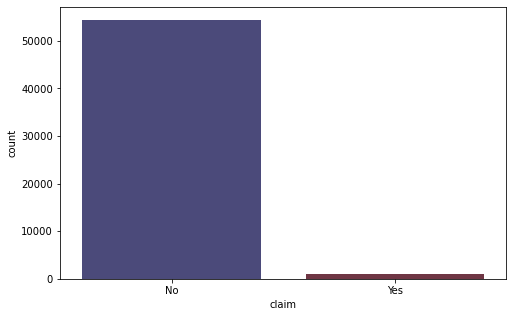

In [318]:
#Gráfica de distribución de la variable respuesta
plt.figure(figsize=(8,5))

fig1 = sns.countplot(data = df, x = "claim", palette='icefire')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();


In [319]:
#Porcentajes variable respuesta
df["claim"].value_counts() / df.shape[0]

No     0.983341
Yes    0.016659
Name: claim, dtype: float64

➡️ **_Conclusiones:_**

El 98,3 de los registros no han reclamado el seguro, solo un 1,7 lo han hecho. Los datos de la variable respuesta están en desvalanceo por lo que tendremos que usar el método SMOTE para subir la cantidad de respuestas tipo yes. 



### 4.2. Distribución de las variables categóricas.

AttributeError: 'AxesSubplot' object has no attribute 'plt'

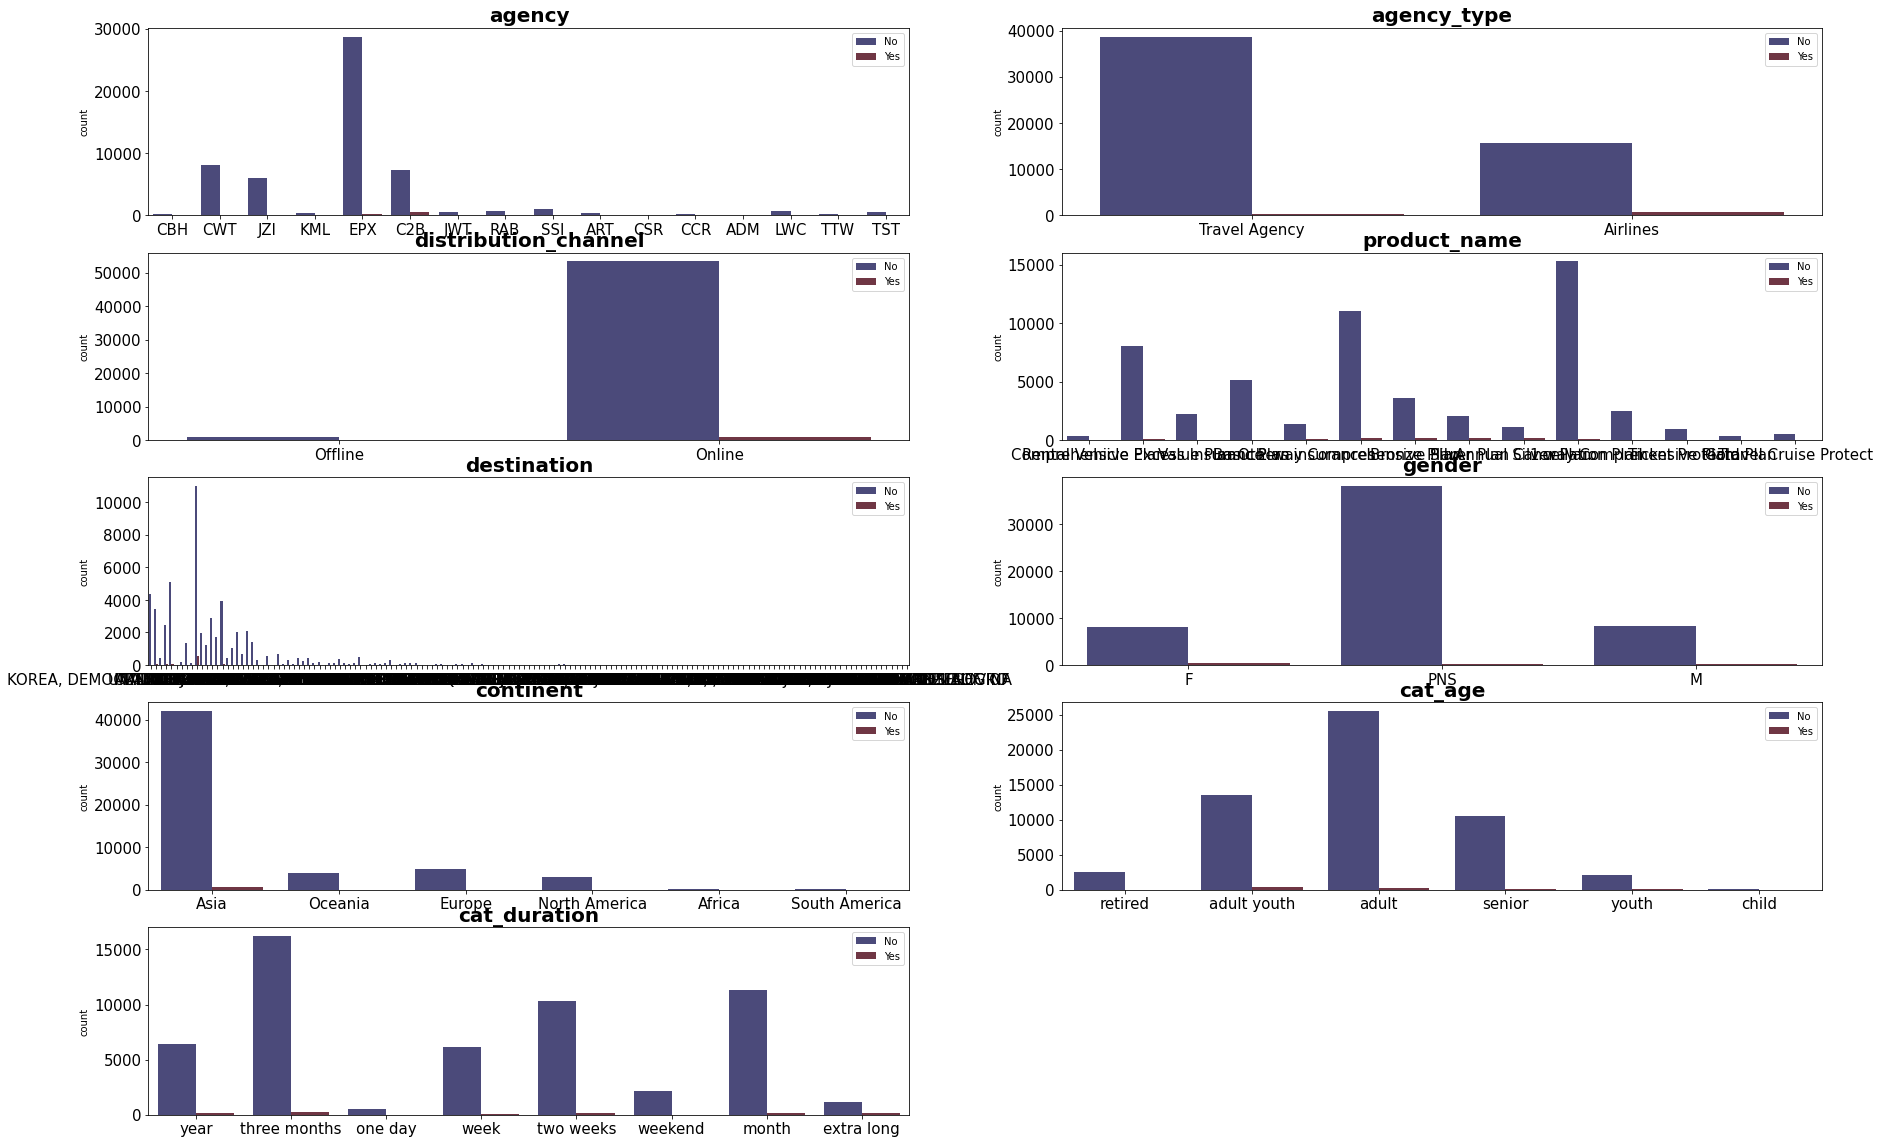

In [329]:
#Gráficas
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (30, 20))

axes = axes.flat
columnas_cat = df.select_dtypes(include = "object").columns
columnas_cat = columnas_cat.drop('claim')


for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df,
        x = colum,
        hue = "claim", 
        ax = axes[i],
        palette='icefire')
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")
    
    

fig.delaxes(axes[-1])
#axes[0].plt.xticks(rotation=40)
fig.tight_layout();

➡️ **_Conclusiones:_**



### 4.3. Distribución de las variables numéricas.

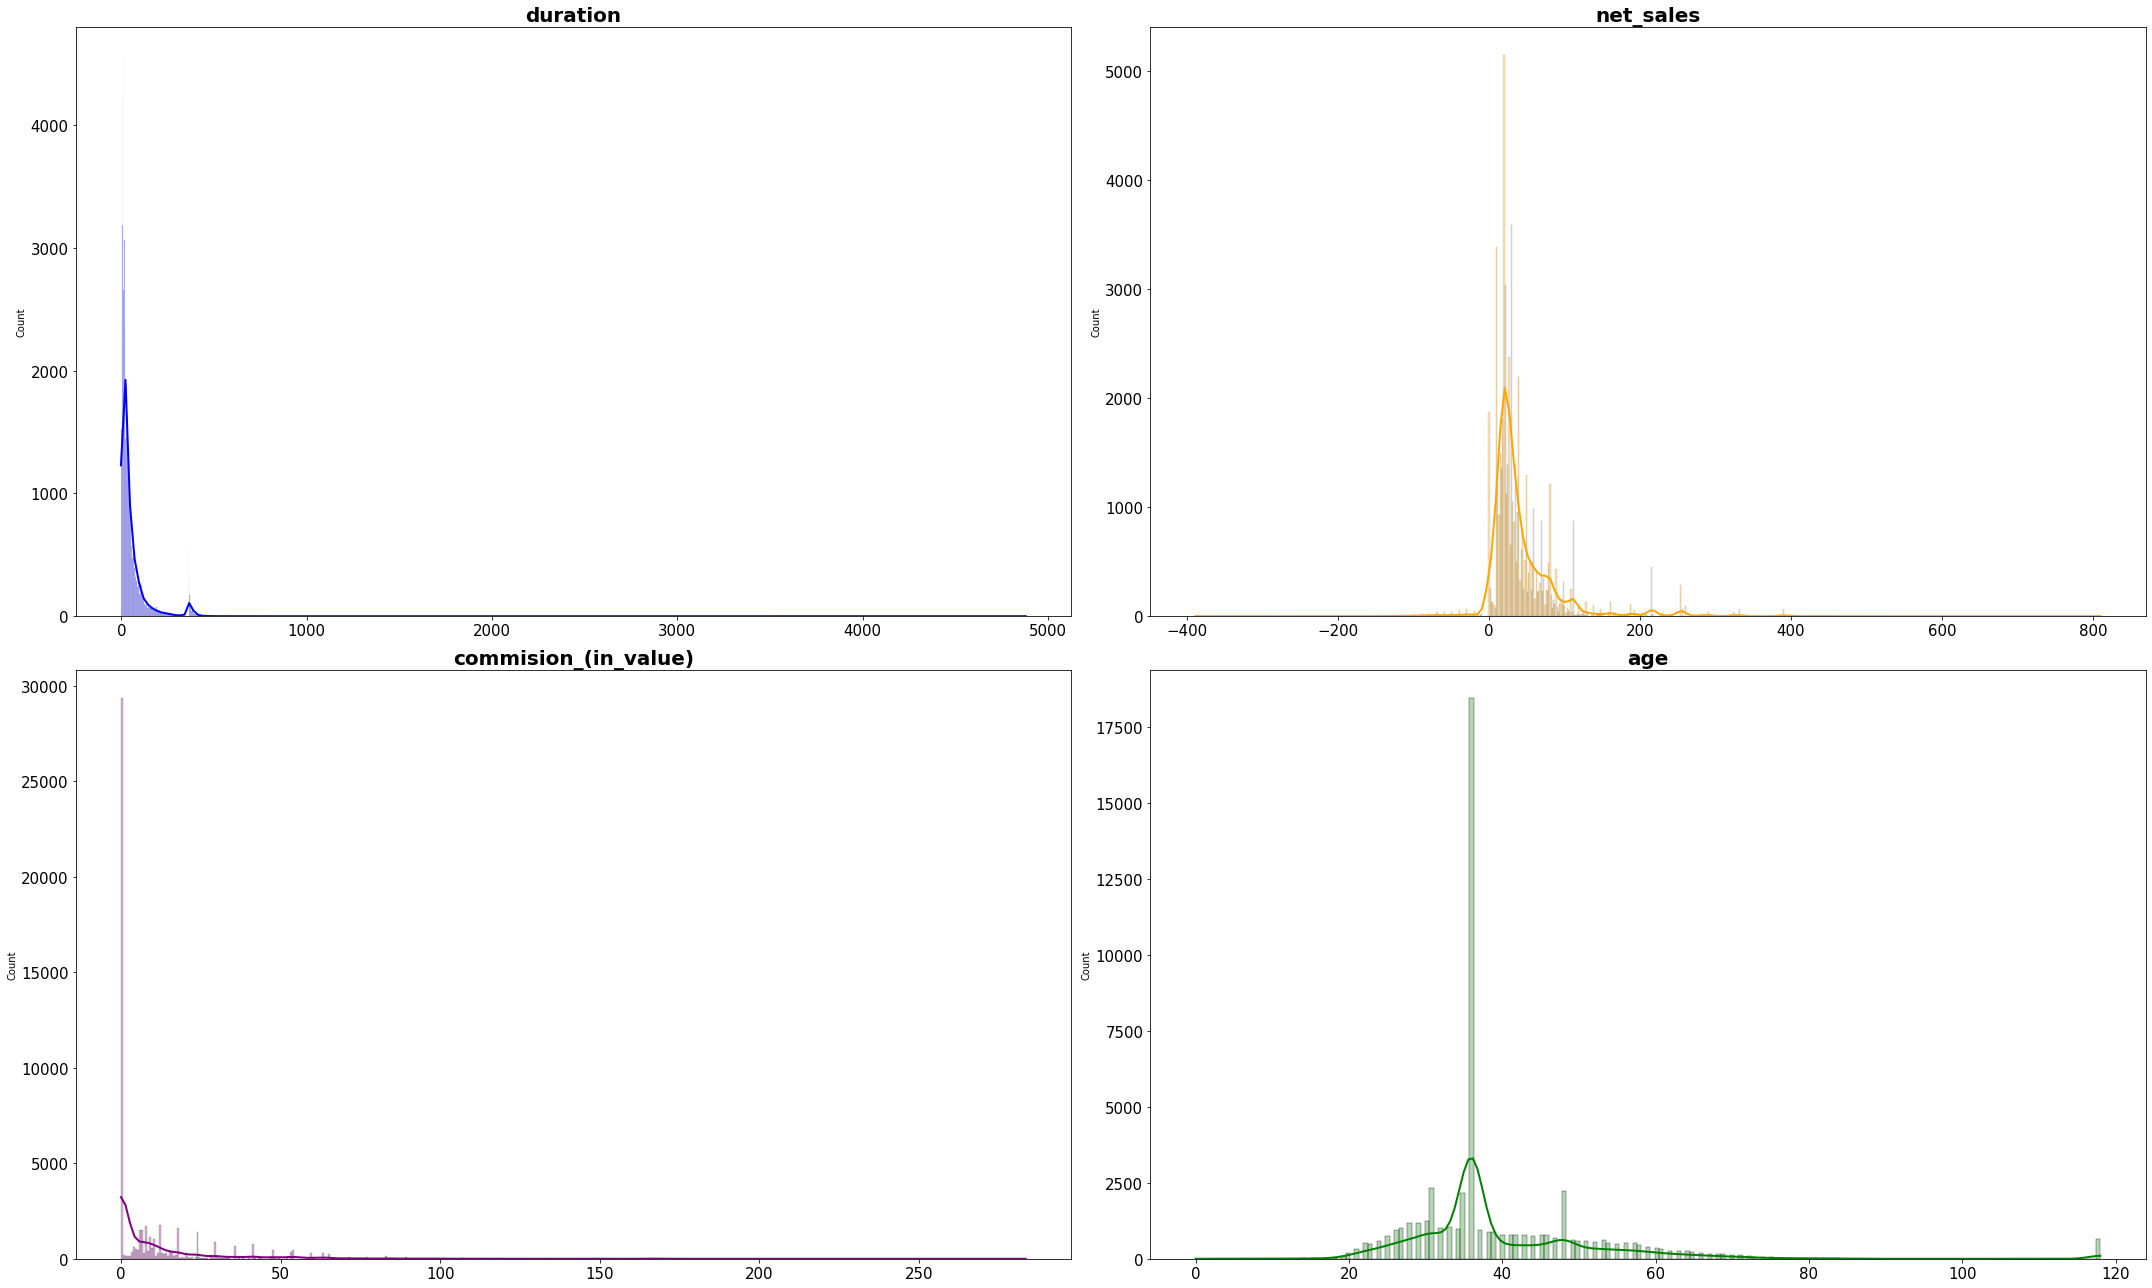

In [ ]:
#Gráficas
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 18))

lista_colores = ["blue", "orange", "purple", "green"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i],
        #palette='icefire',
        line_kws = {"linewidth": 2},  
        alpha = 0.3, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")
    
    
fig.tight_layout();

➡️ **_Conclusiones:_**



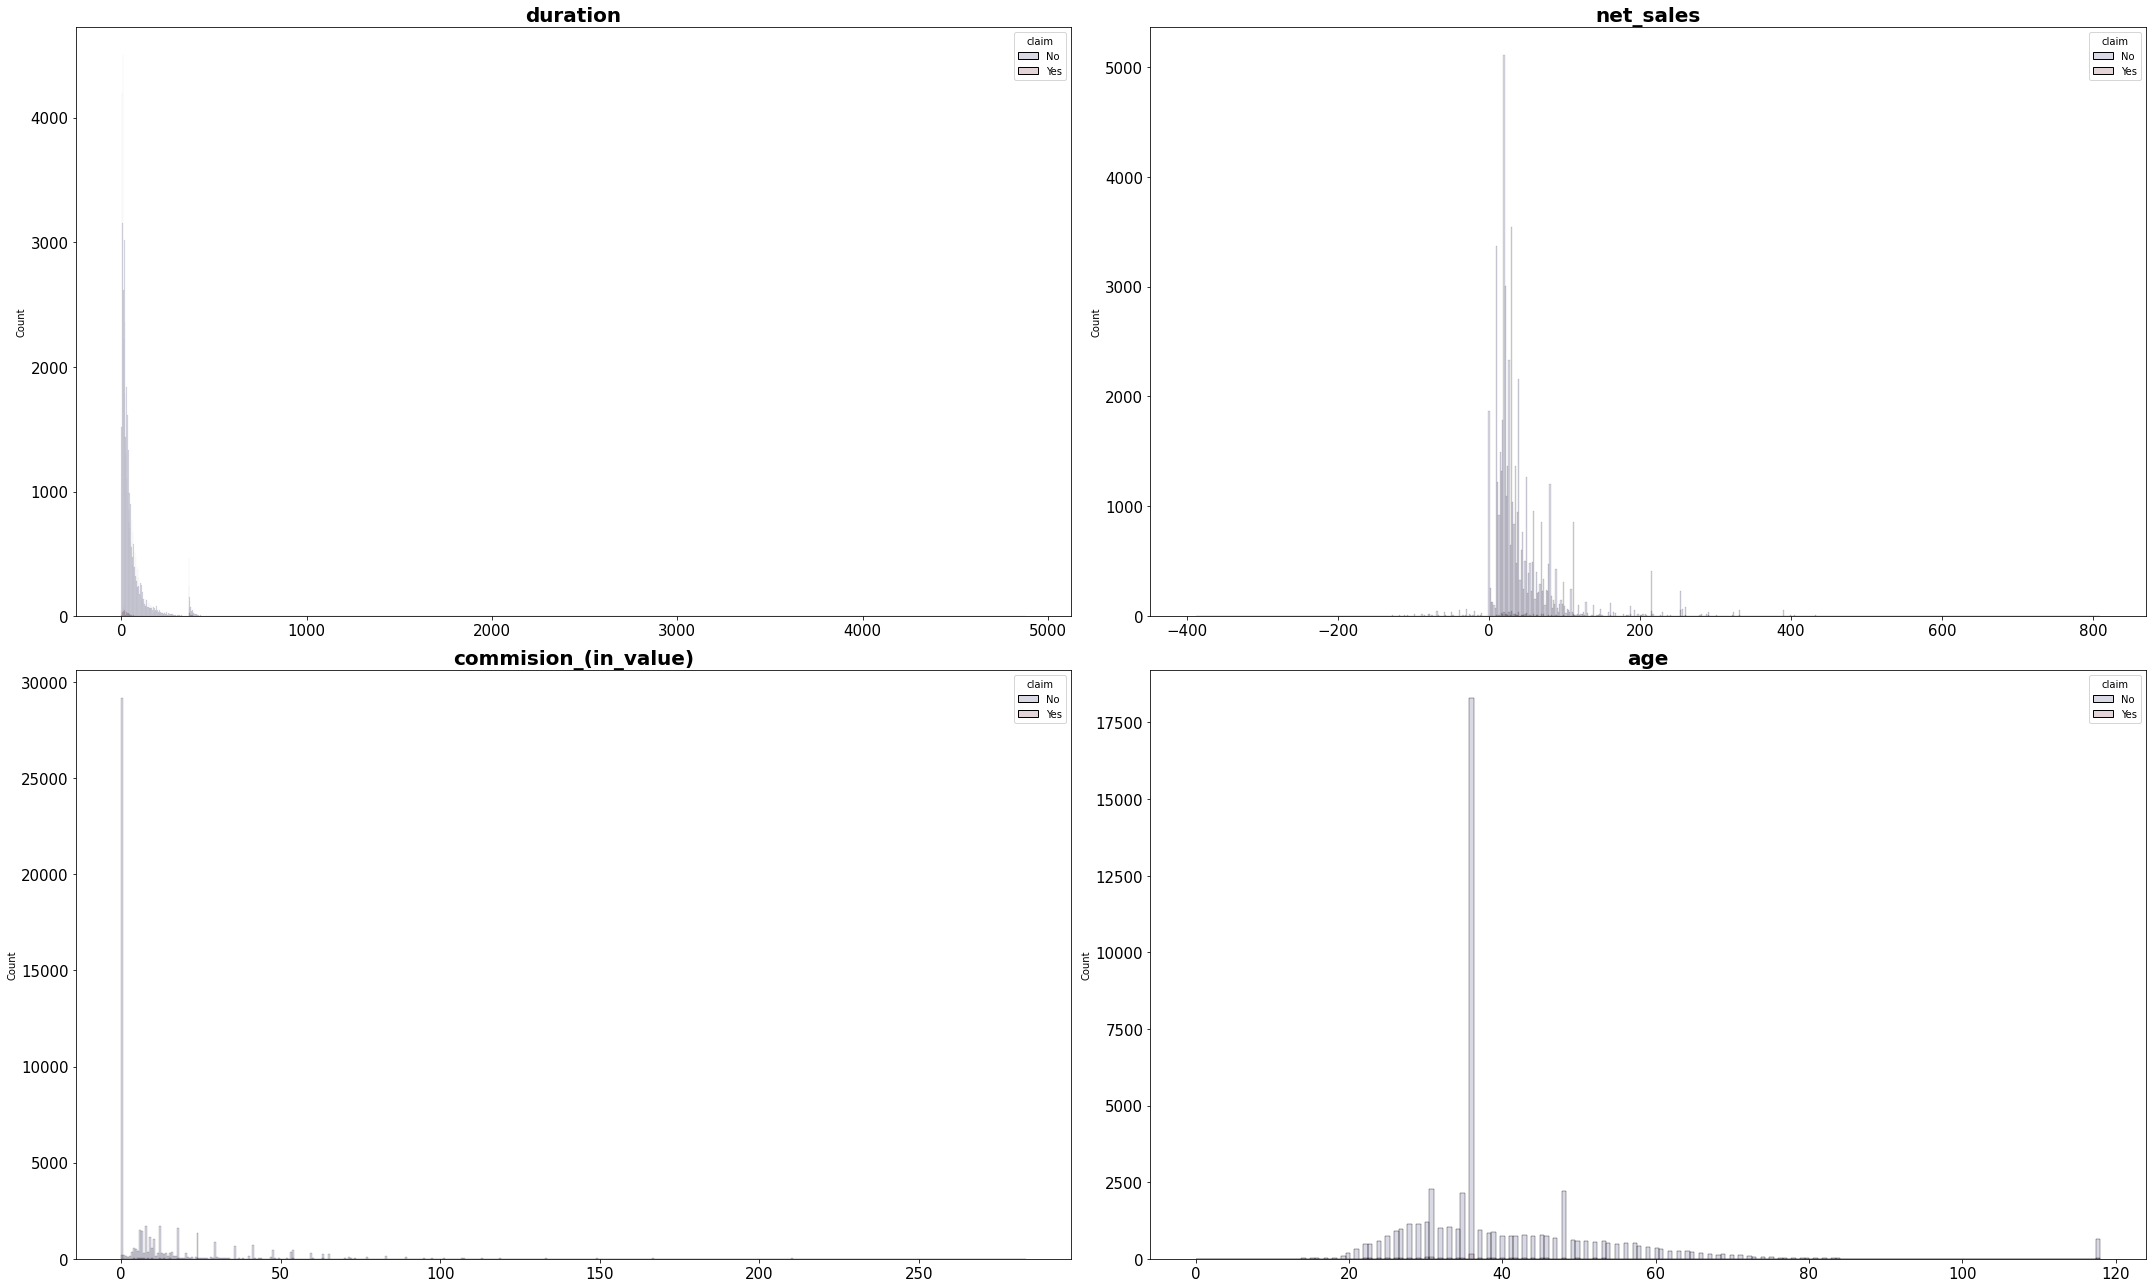

In [ ]:
# Gráficas

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 18))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
#columnas_numeric = columnas_numeric.drop("claim")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        hue = "claim", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        palette='icefire',
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")
    
fig.tight_layout();

➡️ **_Conclusiones:_**



### 4.4. Correlación.

In [ ]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.head()

,duration,net_sales,commision_(in_value),age
0,186,-29.0,9.57,81
1,186,-29.0,9.57,71
2,65,-49.5,29.70,32
3,60,-39.6,23.76,32
4,79,-19.8,11.88,41


In [ ]:
correlacion = df_numericas.corr()
correlacion

,duration,net_sales,commision_(in_value),age
duration,1.000000,0.407629,0.328179,0.007929
net_sales,0.407629,1.000000,0.643100,0.036790
commision_(in_value),0.328179,0.643100,1.000000,0.114860
age,0.007929,0.036790,0.114860,1.000000


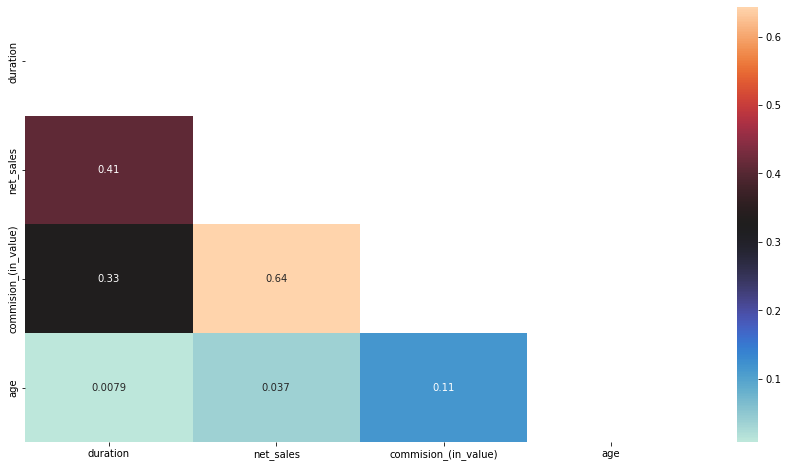

In [ ]:
#Gráfico de correlación
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="icefire", annot = True, mask = mask);

➡️ **_Conclusiones:_**



### 4.5. Tratamiento de outliers.

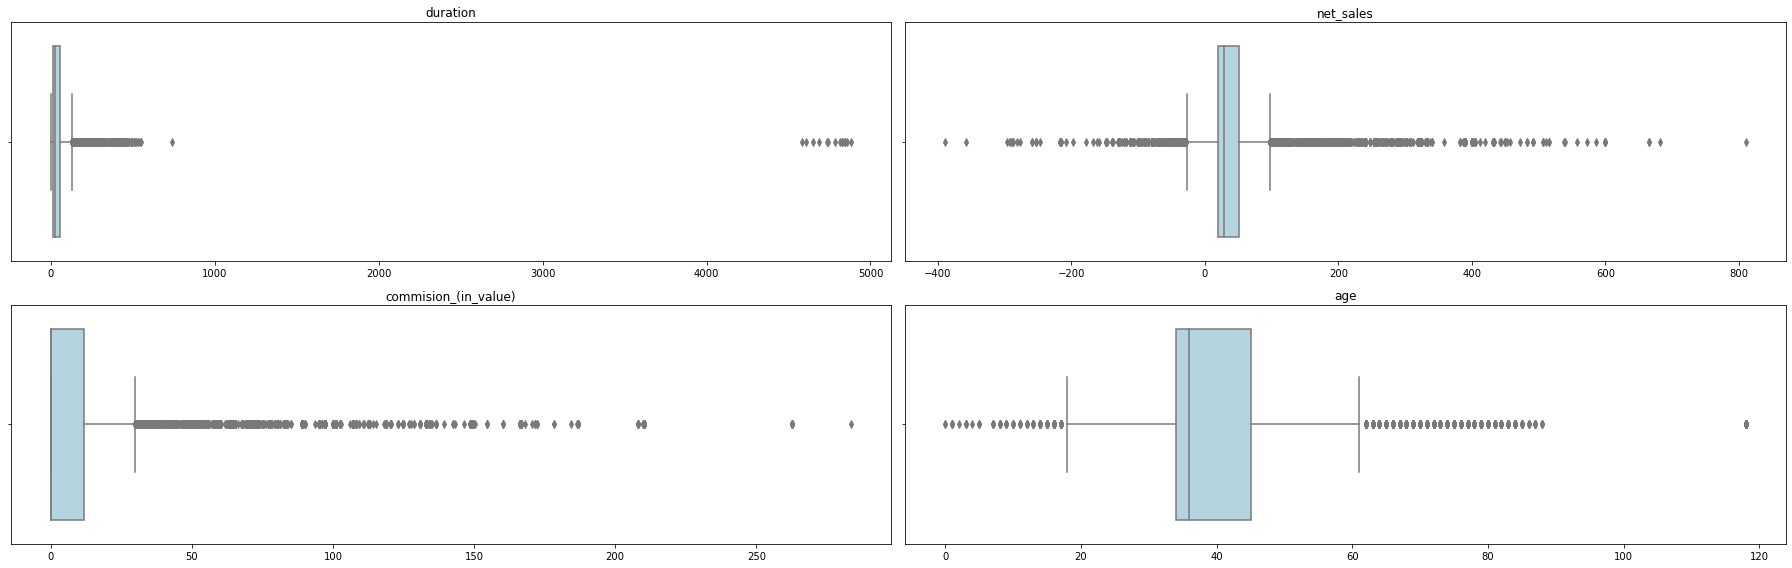

In [ ]:
#Gráfica de outliers
fig, axes = plt.subplots(2, 2, figsize=(25,8))

df_numericas = df.select_dtypes(include = np.number)
categorias = df_numericas.columns

axes = axes.flat

for indice, cate in enumerate(categorias):

    sns.boxplot(x = df[cate], data = df, ax=axes[indice], color='lightblue')
    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")

fig.tight_layout();

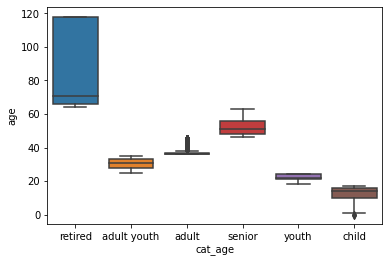

In [ ]:
sns.boxplot(data= df, x= "cat_age", y="age");

➡️ **_Conclusiones:_**



In [330]:
df.head()

,agency,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commision_(in_value),gender,age,continent,cat_age,cat_duration
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81,Asia,retired,year
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71,Asia,retired,year
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,PNS,32,Oceania,adult youth,three months
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,PNS,32,Oceania,adult youth,three months
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,PNS,41,Europe,adult,three months


### 5. Interpretación de los resultados.

➡️ **_Conclusiones:_**

- Distribuidas y marcadas por todo el notebook
- 


### 6. Guardad el dataframe.

In [331]:
df.to_csv('../archivos/travel_1.csv')